# Logistic regression model

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will compare the logistic regression implementations of `scikit-learn` and `statsmodels`.

We will evaluate:

- log-loss
- log-likelihood
- deviance
- p-value of the model
- R-statistic 

These are the first steps towards understanding if the model shows a good fit to the data. 

Only when the model shows a good fit can we derive meaningful interpretations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

### Load data

To obtain the data, check the folder `prepare-data` in this repo, or section 2 in the course.

In [2]:
# load titanic dataset

df = pd.read_csv('../titanic.csv')

df.head()

,pclass,sibsp,parch,survived,sex_female,embarked_S,embarked_C,cabin_B,cabin_C,cabin_E,cabin_D,cabin_A,cabin_M,cabin_G
0,1,0,0,1,1,1,0,1,0,0,0,0,0,0
1,1,1,2,1,0,1,0,0,1,0,0,0,0,0
2,1,1,2,0,1,1,0,0,1,0,0,0,0,0
3,1,1,2,0,0,1,0,0,1,0,0,0,0,0
4,1,1,2,0,1,1,0,0,1,0,0,0,0,0


In [3]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("survived", axis=1),
    df["survived"],
    test_size=0.15,
    random_state=1,
)

X_train.shape, X_test.shape

((1112, 13), (197, 13))

In [4]:
# scale the variables
scaler = StandardScaler().set_output(transform="pandas")

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# display top 5 rows
X_train.head()

,pclass,sibsp,parch,sex_female,embarked_S,embarked_C,cabin_B,cabin_C,cabin_E,cabin_D,cabin_A,cabin_M,cabin_G
1021,0.834271,-0.474139,-0.456096,-0.739319,0.666450,-0.516251,-0.22592,-0.280294,-0.182913,-0.193167,-0.128271,0.539927,-0.067206
512,-0.367425,0.469050,-0.456096,-0.739319,-1.500487,1.937043,-0.22592,-0.280294,-0.182913,-0.193167,-0.128271,0.539927,-0.067206
957,0.834271,2.355428,0.745749,1.352596,0.666450,-0.516251,-0.22592,-0.280294,-0.182913,-0.193167,-0.128271,0.539927,-0.067206
1066,0.834271,-0.474139,-0.456096,-0.739319,-1.500487,1.937043,-0.22592,-0.280294,-0.182913,-0.193167,-0.128271,0.539927,-0.067206
1259,0.834271,-0.474139,-0.456096,-0.739319,0.666450,-0.516251,-0.22592,-0.280294,-0.182913,-0.193167,-0.128271,0.539927,-0.067206


### Visualize data

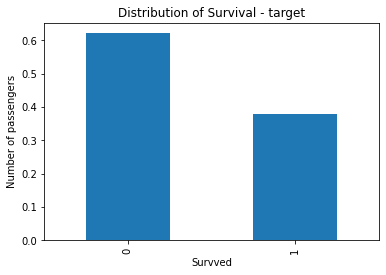

In [5]:
# Display the target distribution

y_train.value_counts(normalize=True).plot.bar()
plt.xlabel("Survved")
plt.ylabel("Number of passengers")
plt.title("Distribution of Survival - target")
plt.show()

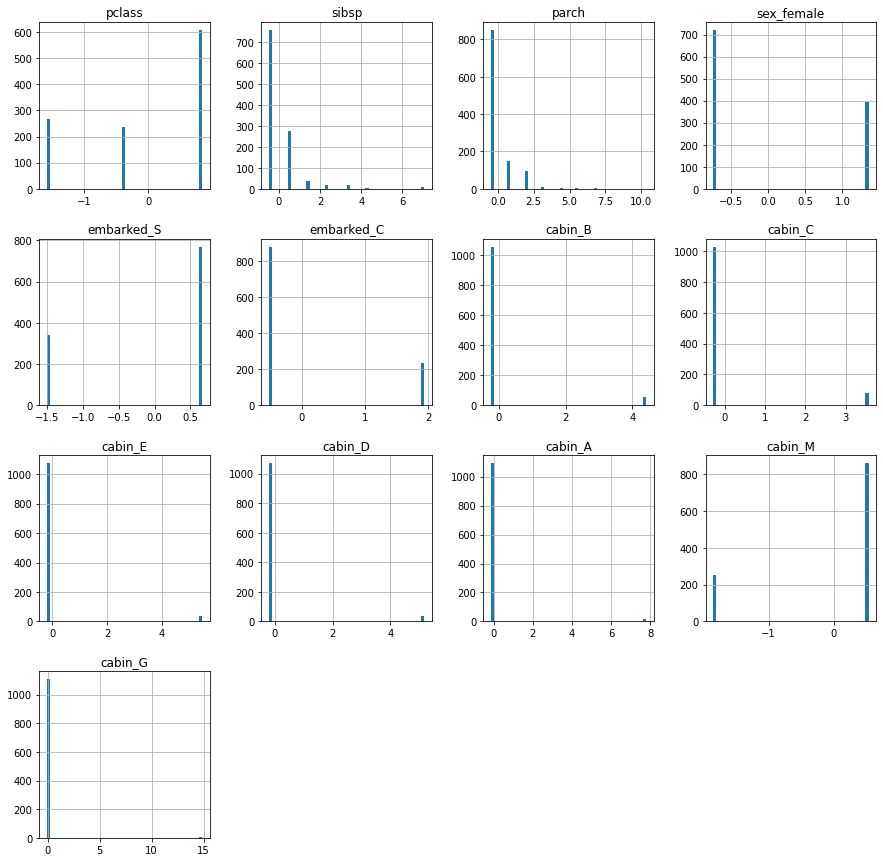

In [6]:
# Display the variables distribution

X_train.hist(bins=50, figsize=(15, 15))
plt.show()

## Statsmodels

In [7]:
# Our model needs an intercept so we add a column of 1s:

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [8]:
# Fit logistic regression model

logit_mod = sm.Logit(y_train, X_train_sm)

logit_res = logit_mod.fit()

print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.469479
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1112
Model:                          Logit   Df Residuals:                     1098
Method:                           MLE   Df Model:                           13
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.2923
Time:                        10:56:14   Log-Likelihood:                -522.06
converged:                       True   LL-Null:                       -737.67
Covariance Type:            nonrobust   LLR p-value:                 5.606e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6505      0.079     -8.267      0.000      -0.805      -0.496
pclass        -0.5174      0.

**Note**: It is important to one hot encode into k-1 for logistic regression, otherwise the Logit from statsmodels will raise a convergence error, due to data redundancy.

In [9]:
# obtain predictions

pred_train = logit_res.get_prediction(X_train_sm).summary_frame()["predicted"]

pred_test = logit_res.get_prediction(X_test_sm).summary_frame()["predicted"]

In [10]:
print(f"Accuracy in train set: {accuracy_score(y_train, pred_train>0.5)}")

print(f"Accuracy in test set: {accuracy_score(y_test, pred_test>0.5)}")

Accuracy in train set: 0.7850719424460432
Accuracy in test set: 0.8020304568527918


The p-value of the model is significant, the LL of the model is smaller than the baseline, and some of the coefficients also show significant p-values (more on this later). That means that we have a decent linear model. 

We can now make global and local interpretations ==> Later in this course!

## Scikit-learn

Sklearn does not output all the statistics that we need out of the box, so we need to calculate them manually. 

Let's see how to do that.

In [11]:
# fit model

# important to remove the penalty for unregularized regression.
logit = LogisticRegression(penalty=None, random_state=1)

logit.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=1)

In [12]:
# Accuracy in train set

logit.score(X_train, y_train)

0.7850719424460432

In [13]:
# Accuracy in test set

logit.score(X_test, y_test)

0.8020304568527918

In [14]:
# coefficients

pd.Series(logit.coef_[0], index=logit.feature_names_in_)

pclass       -0.517374
sibsp        -0.226898
parch         0.054203
sex_female    1.199899
embarked_S   -0.008459
embarked_C    0.234049
cabin_B      -0.219822
cabin_C      -0.376500
cabin_E      -0.025204
cabin_D      -0.198210
cabin_A      -0.105084
cabin_M      -0.680452
cabin_G      -0.143629
dtype: float64

### Evaluate the model

We need to calculate all of these statistics manually.


- log-loss
- log-likelihood
- deviance
- p-value of the model
- R-statistic

In [15]:
# baseline model: mean of the target

base_preds = np.ones(len(y_train)) * y_train.mean()

base_preds

array([0.37859712, 0.37859712, 0.37859712, ..., 0.37859712, 0.37859712,
       0.37859712])

In [16]:
# logit predictions

model_preds = logit.predict_proba(X_train)[:,1]

model_preds

array([0.10348986, 0.23888613, 0.44378169, ..., 0.06088701, 0.28585885,
       0.58687262])

### Log loss

In [17]:
# baseline log loss

log_loss(y_train, base_preds)

0.6633731715697522

In [18]:
# model log loss

log_loss(y_train, model_preds)

0.46947874574848963

### Log-likelihood

In [19]:
def ll(y_true, y_pred):
    return - log_loss(y_true, y_pred, normalize=False)

In [20]:
# baseline log likelihood

ll(y_train, base_preds)

-737.6709667855644

In [21]:
# model log likelihood

ll(y_train, model_preds)

-522.0603652723205

### Deviance

In [22]:
def deviance(y_true, y_pred):
    return 2 * log_loss(y_true, y_pred, normalize=False)

In [23]:
# baseline deviance

dev_base = deviance(y_train, base_preds)

dev_base

1475.3419335711287

In [24]:
# model deviance

dev_model = deviance(y_train, model_preds)

dev_model

1044.120730544641

### p-value

In [25]:
x2 = dev_base - dev_model

df = len(logit.feature_names_in_)

1 - stats.chi2.cdf(x2, df)

0.0

### R-statistic

In [26]:
R = ( dev_base - dev_model )/ dev_base

R

0.29228560052021174

We obtained the same values as we did with `statsmodels`. Well done us!